# Kalp Rahatsızlığının Tespit Edilmesi

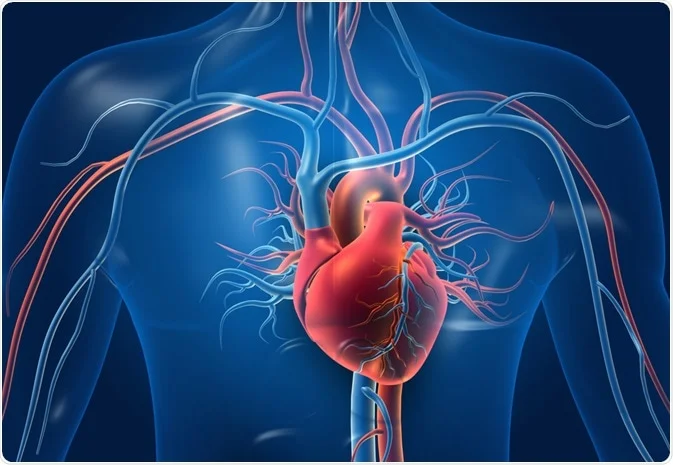

## Veri Seti Hikayesi;

### Bağımsız Değişkenler;

* **Age:** Hastanın Yaşı

* **Sex:** Hastanın Cinsiyeti [M: Erkek, F: Kadın]

* **ChestPainType:** Göğüs Ağrısı Tipi [TA: Typical Angina : Ağrı veya rahatsızlık, fiziksel aktivite veya egzersiz sırasında ortaya çıkar. Dinlenme veya ilaçla geçer.
                                   ATA: Atypical Angina : Ağrı veya rahatsızlık, sadece fiziksel aktivitede değil dinlenme ve stres altında da ortaya çıkabilir. Dinlenme veya ilaçla geçmez.
                                   NAP: Non-Anginal Pain : Göğüs ağrısının kalple alakalı olmadığı durumlar.
                                   ASY: Asymptomatic : Ağrı veya rahatsızlığın hissedilmediği fakat genellikle rutin bir muayene veya test sırasında saptanan kalp problemleri olabilir.]

* **RestingBP:** Dinlenme durumundayken kan basıncı mm Hg cinsinden

* **Cholesterol:** Kandaki kolestrol seviyesi mm/dl cinsinden

* **FastingBS:** Açlık kan şekeri [1: Açlık Kan Şekerinin 120 mg/dl'den büyük olduğu durumlar. ,0: 120 mg/dl'den küçük olduğu durumlar]

* **RestingECG:** EKG [Normal: Kalpte herhangi bir anormallik bulunmadığı anlamına gelir.
              ST: ST-T dalgası anormalliklerini ifade eder. Kalp krizi akut gibi durumlarda görülür.
              LVH: Sol ventrikül hipertrofisinin olası veya kesin belirtilerini ifade eder ve bu, kalp duvarlarının kalınlaştığı ve büyüdüğü anlamına gelir.]

* **MaxHR:** Elde edilen maksimum kalp atış hızı

* **ExerciseAngina:** Egzersize bağlı göğüs ağrısı [Y: Evet, N: Hayır]

* **Oldpeak:** Egzersiz stres testi sırasında kaydedilen ST segmentindeki depresyon miktarını ifade eder.

* **ST_Slope:**  [Up: Egzersiz sırasında ST segmenti yukarı doğru bir eğim gösterme durumudur. Bu, normal bir tepki olarak kabul edilir ve genellikle kalp sağlığının iyi olduğunu gösterir.
                                                    Flat: ST segmenti egzersiz sırasında düz bir eğim gösterme durumudur. Bu, genellikle belirsiz bir sonuçtur.
                                                    Down: Egzersiz sırasında ST segmenti aşağı doğru bir eğim gösterme durumudur. Bu durum, kalp kasının o bölgesindeki kan akışının yetersiz olduğunu veya kalp yetmezliği belirtileri olabileceğini gösterebilir.]

### Bağımlı Değişken;

* **HeartDisease:** [1: Kalp hastası, 0: Normal]

In [522]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [523]:
heart = pd.read_csv("heart.csv")
df = heart.copy()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [525]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [526]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [527]:
df["FastingBS"] = df["FastingBS"].astype("object")

kat_df = df.select_dtypes(include="object")

kat_df.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,0,Normal,N,Up
1,F,NAP,0,Normal,N,Flat
2,M,ATA,0,ST,N,Up
3,F,ASY,0,Normal,Y,Flat
4,M,NAP,0,Normal,N,Up


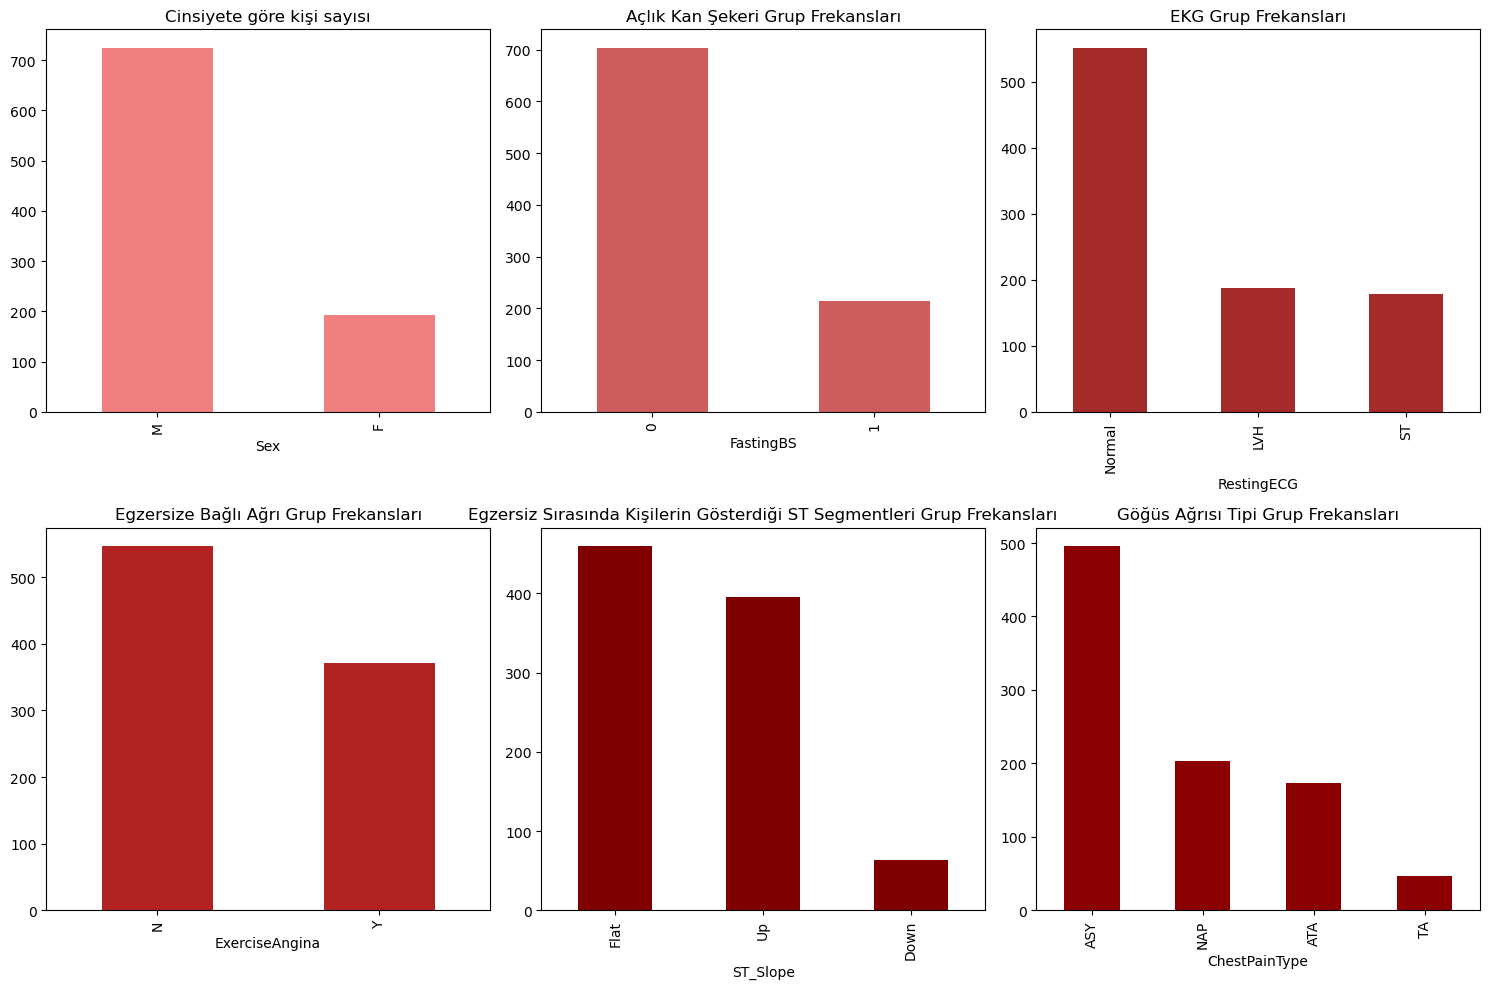

In [528]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
kat_df["Sex"].value_counts().plot.bar(color = 'lightcoral')
plt.title("Cinsiyete göre kişi sayısı")

plt.subplot(2, 3, 2)
kat_df["FastingBS"].value_counts().plot.bar(color = 'indianred')
plt.title("Açlık Kan Şekeri Grup Frekansları")

plt.subplot(2, 3, 3)
kat_df["RestingECG"].value_counts().plot.bar(color = 'brown')
plt.title("EKG Grup Frekansları")

plt.subplot(2, 3, 4)
kat_df["ExerciseAngina"].value_counts().plot.bar(color = 'firebrick')
plt.title("Egzersize Bağlı Ağrı Grup Frekansları")

plt.subplot(2, 3, 5)
kat_df["ST_Slope"].value_counts().plot.bar(color = 'maroon')
plt.title("Egzersiz Sırasında Kişilerin Gösterdiği ST Segmentleri Grup Frekansları")

plt.subplot(2, 3, 6)
kat_df["ChestPainType"].value_counts().plot.bar(color = 'darkred')
plt.title("Göğüs Ağrısı Tipi Grup Frekansları")

plt.tight_layout()

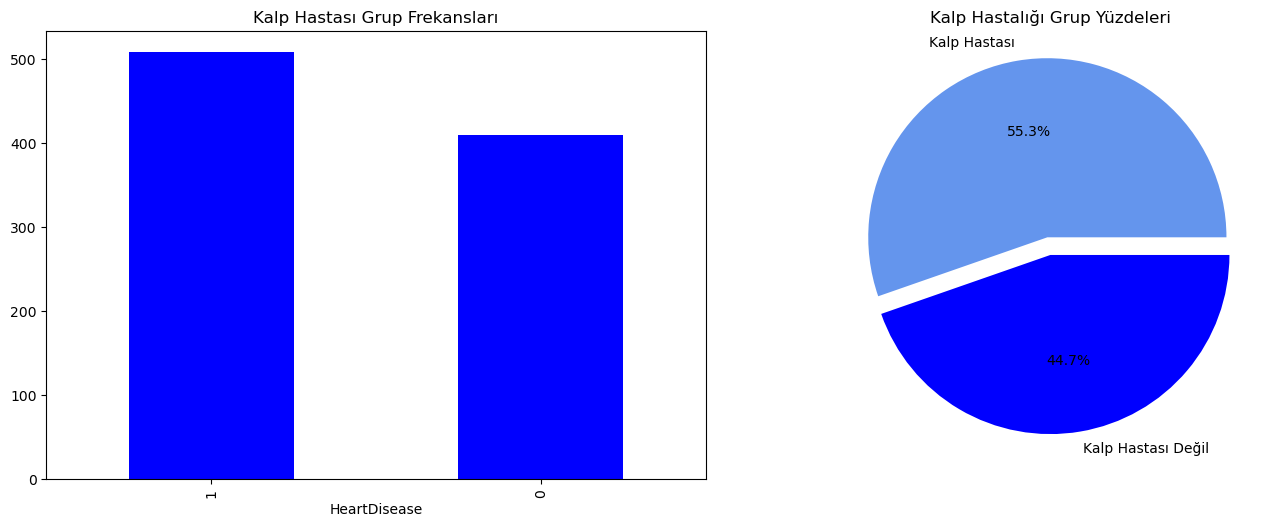

In [529]:
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
df["HeartDisease"].value_counts().plot.bar(color = 'blue').set_title("Kalp Hastası Grup Frekansları")

plt.subplot(2,2,2)
etiket = ["Kalp Hastası", "Kalp Hastası Değil"]
veri = [508, 410]
ayrikparca = (0.1, 0)
renkler = ["cornflowerblue", "blue"]
plt.pie(veri, labels=etiket, colors=renkler, explode = ayrikparca, autopct='%1.1f%%');
plt.title("Kalp Hastalığı Grup Yüzdeleri")

plt.tight_layout()

In [530]:
num_df = df.select_dtypes(include=["int64","float64"]).drop(columns="HeartDisease", axis = 1)

num_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [531]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


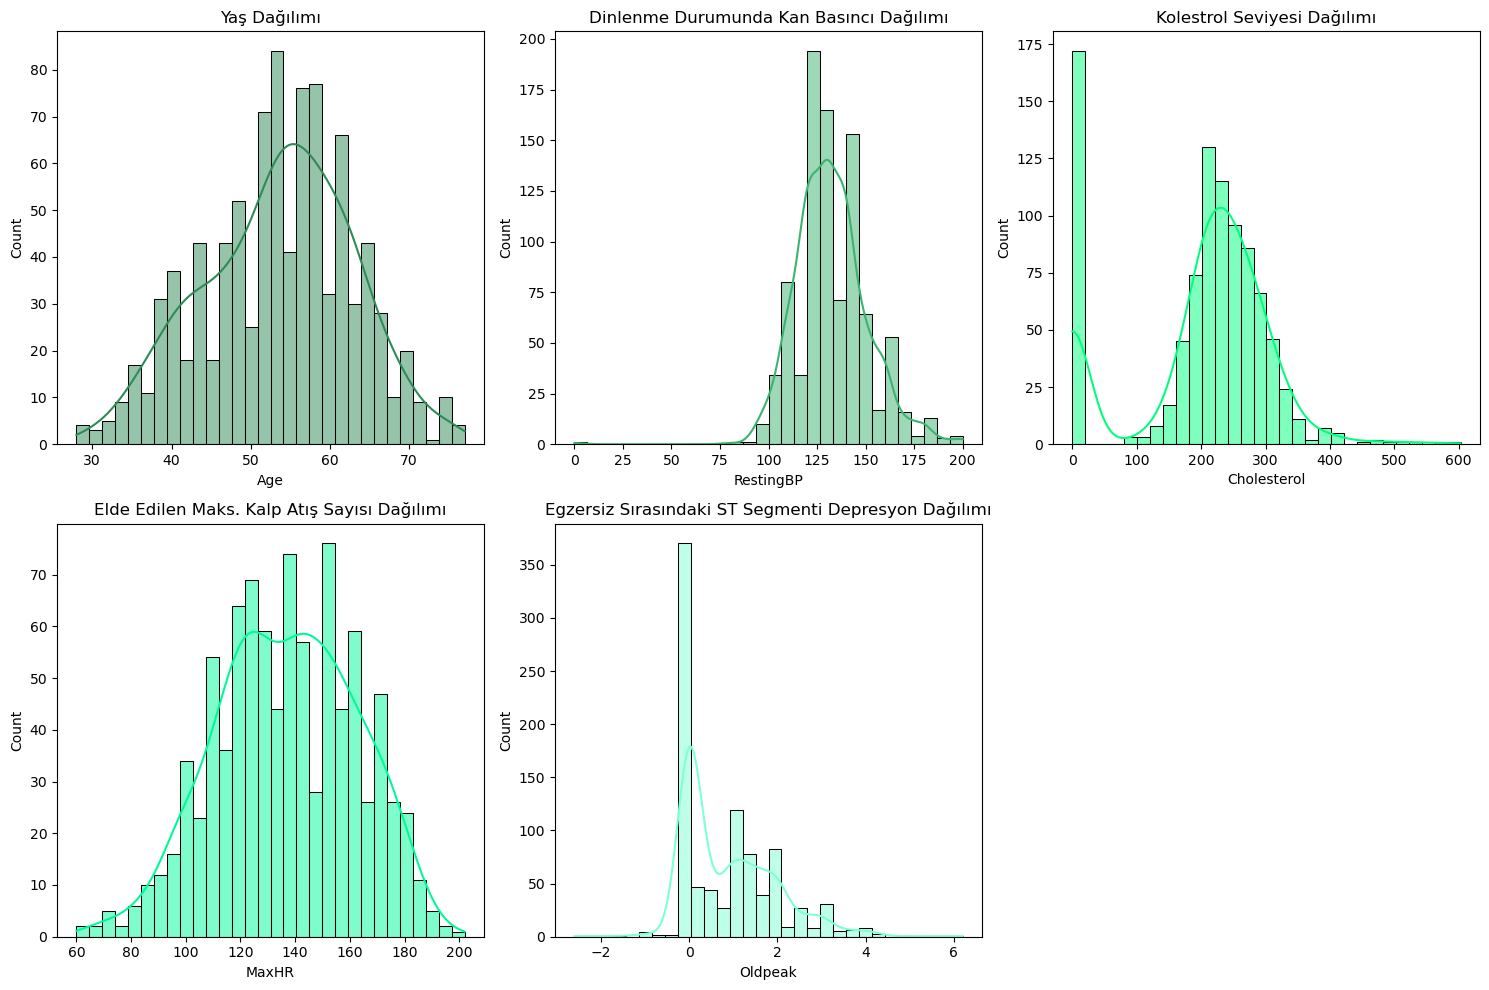

In [532]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(num_df["Age"], bins=30, kde=True, color='seagreen')
plt.title('Yaş Dağılımı')

plt.subplot(2, 3, 2)
sns.histplot(num_df["RestingBP"], bins=30, kde=True, color='mediumseagreen')
plt.title('Dinlenme Durumunda Kan Basıncı Dağılımı')

plt.subplot(2, 3, 3)
sns.histplot(num_df["Cholesterol"], bins=30, kde=True, color='springgreen')
plt.title('Kolestrol Seviyesi Dağılımı')

plt.subplot(2, 3, 4)
sns.histplot(num_df["MaxHR"], bins=30, kde=True, color='mediumspringgreen')
plt.title('Elde Edilen Maks. Kalp Atış Sayısı Dağılımı')

plt.subplot(2, 3, 5)
sns.histplot(num_df["Oldpeak"], bins=30, kde=True, color='aquamarine')
plt.title('Egzersiz Sırasındaki ST Segmenti Depresyon Dağılımı')

plt.tight_layout()

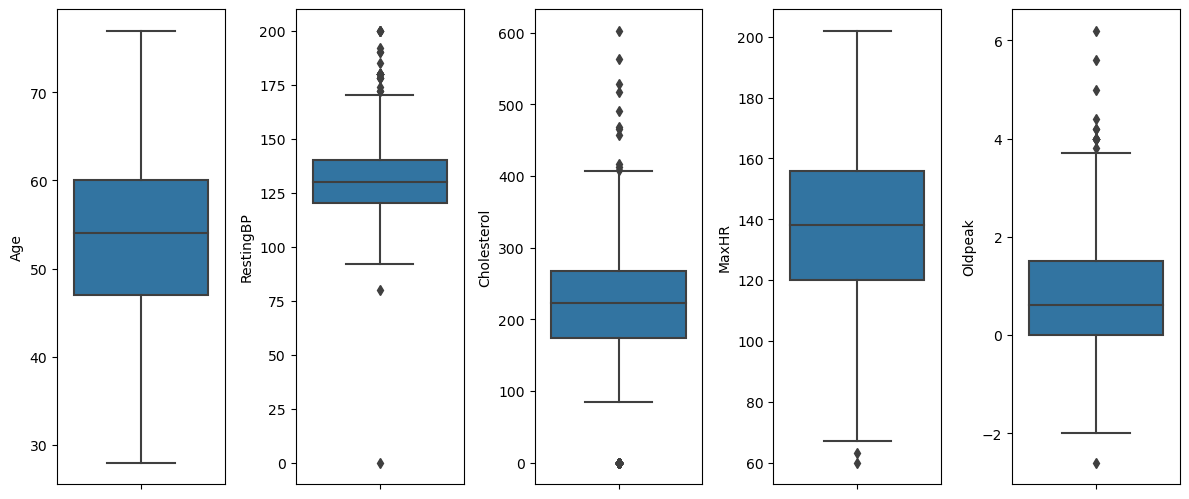

In [533]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 5, 1)
sns.boxplot(y = df["Age"])

plt.subplot(2, 5, 2)
sns.boxplot(y = df["RestingBP"])

plt.subplot(2, 5, 3)
sns.boxplot(y = df["Cholesterol"])

plt.subplot(2, 5, 4)
sns.boxplot(y = df["MaxHR"])

plt.subplot(2, 5, 5)
sns.boxplot(y = df["Oldpeak"])

plt.tight_layout()

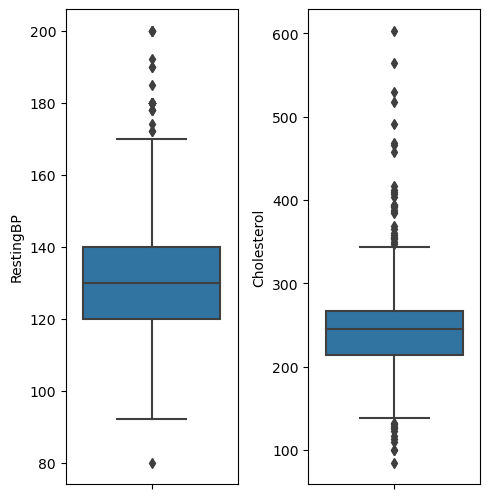

In [535]:
# Sağlık verisi olduğu için uç değer görülmesi normal karşılanabilir fakat RestingBP'deki 0 değeri ve Cholesterol'deki 0 değeri göze çarpıyor, 
# böyle bir durum mümkün olamayacağı için ortalamayla doldurmak istedim.
# Oldpeak değerindeki -2 yaptığım  araştırmaya göre ciddi bir kalp hastalığını işaret edebileceğinden bu değeri doldurmak veya çıkarmak istemedim.

df['RestingBP'].replace(0, df[df['RestingBP'] != 0]['RestingBP'].mean(), inplace=True)
df['Cholesterol'].replace(0, df[df['Cholesterol'] != 0]['Cholesterol'].mean(), inplace=True)

plt.figure(figsize=(5, 10))

plt.subplot(2,2,1)
sns.boxplot(y = df["RestingBP"])

plt.subplot(2,2,2)
sns.boxplot(y = df["Cholesterol"])

plt.tight_layout()

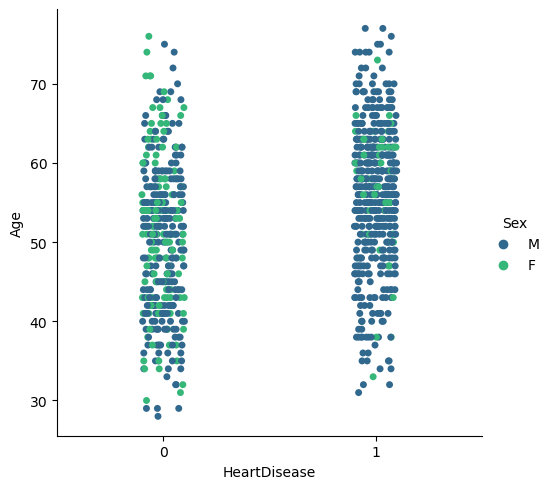

In [536]:
sns.catplot(x = "HeartDisease",
            y = "Age",
            hue = "Sex",
            palette = "viridis",
            data = df)

# Kalp rahatsızlığı olan kişilerin çoğunluğu 40 yaş üstü erkeklerden oluşmaktadır.

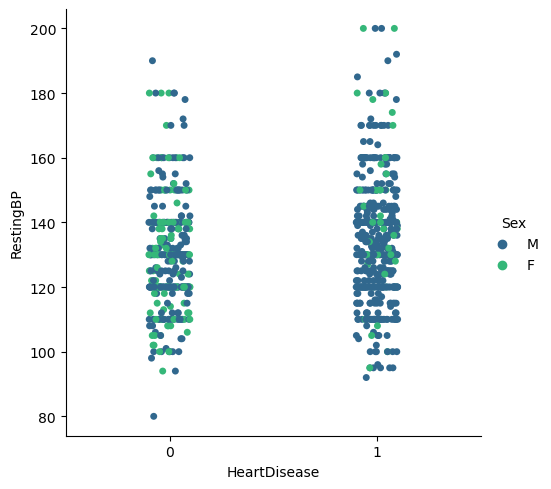

In [537]:
sns.catplot(x = "HeartDisease",
            y = "RestingBP",
            hue= "Sex",
            palette="viridis",
            data = df)

# Kalp rahatsızlığı olan kişilerin dinlenme durumundaki kan basıncı 110-150 arasında yoğunluk göstermektedir.

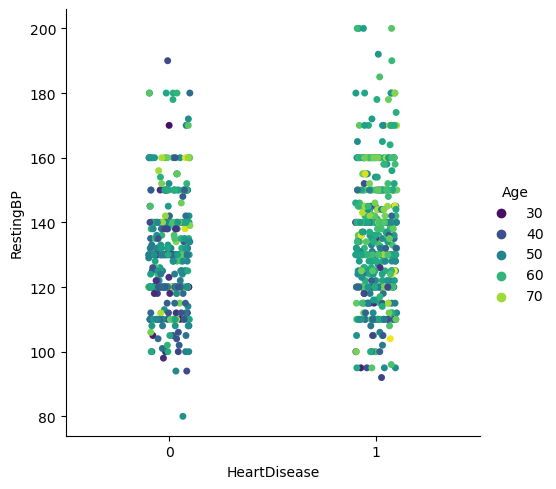

In [538]:
sns.catplot(x = "HeartDisease",
            y = "RestingBP",
            hue= "Age",
            palette="viridis",
            data = df)

# Kalp rahatsızlığı olan kişilerde yaş arttıkça dinlenme durumundaki kan basıncı artış göstermektedir.

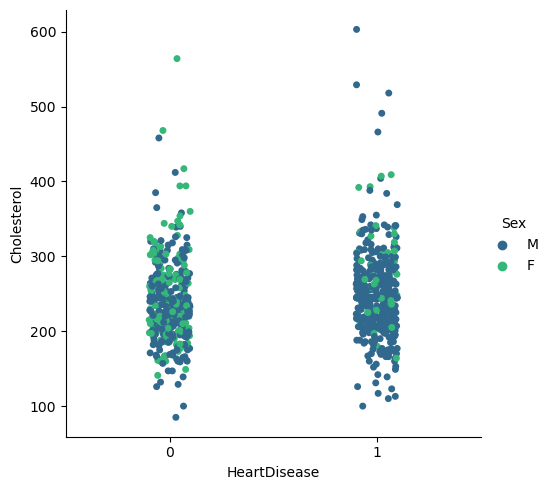

In [539]:
sns.catplot(x = "HeartDisease",
            y = "Cholesterol",
            hue= "Sex",
            palette="viridis",
            data = df)

# Kalp rahatsızlığı olan kişilerin kolestrol değerleri 180-300 değerleri arasında yoğunluk göstermektedir.
# Kalp hastalığı olmayan kişilerde de bu benzer durumda.

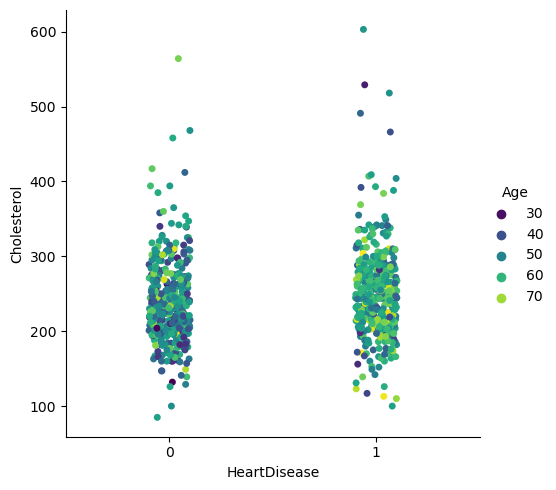

In [540]:
sns.catplot(x = "HeartDisease",
            y = "Cholesterol",
            hue= "Age",
            palette="viridis",
            data = df)

# Kalp rahatsızlığı olan kişilerin kolestrol değerleri yaşa göre rastgele dağılmaktadır.

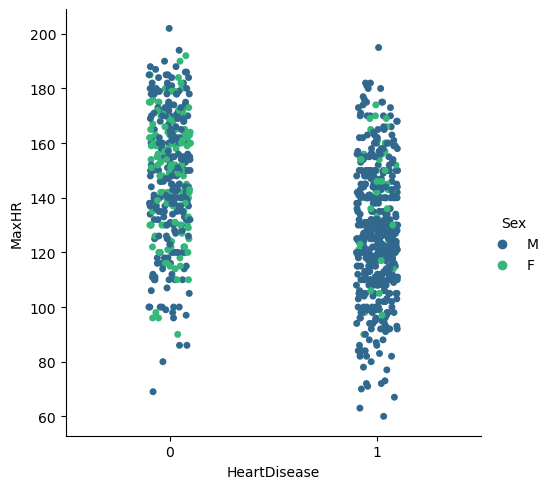

In [541]:
sns.catplot(x = "HeartDisease",
            y = "MaxHR",
            hue= "Sex",
            palette="viridis",
            data = df)

# Kalp hatası olmayan kişilerin kalp atış hızı kalp hastalarına göre daha yüksek olduğu gözlemlenmiştir.

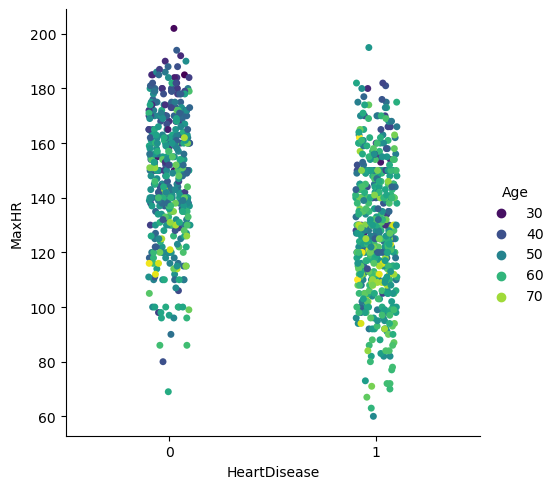

In [542]:
sns.catplot(x = "HeartDisease",
            y = "MaxHR",
            hue= "Age",
            palette="viridis",
            data = df)

# Yaş değişkeni eklendiğinde bu durumun yaşla alakalı olduğu gözlemlenmiştir.

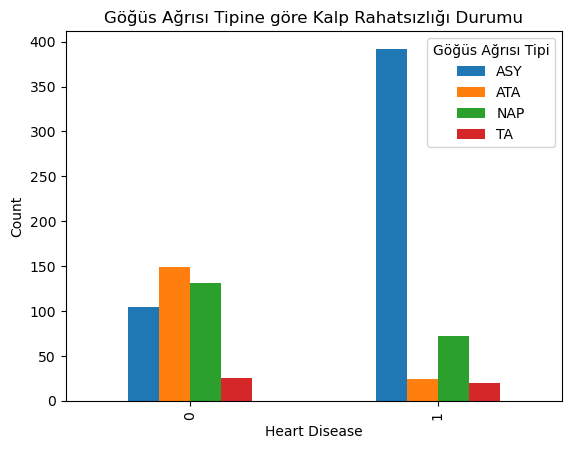

In [543]:
counts = df.groupby(["HeartDisease", "ChestPainType"]).size().unstack()

counts.plot(kind="bar")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Göğüs Ağrısı Tipine göre Kalp Rahatsızlığı Durumu")
plt.legend(title="Göğüs Ağrısı Tipi", loc='upper right')
plt.show()

# Kalp rahatsızlığının ağrı veya sızı hissedilmediği, genel rutinde ortaya çıkan kişilerin daha fazla olduğu gözlemlenmiştir.

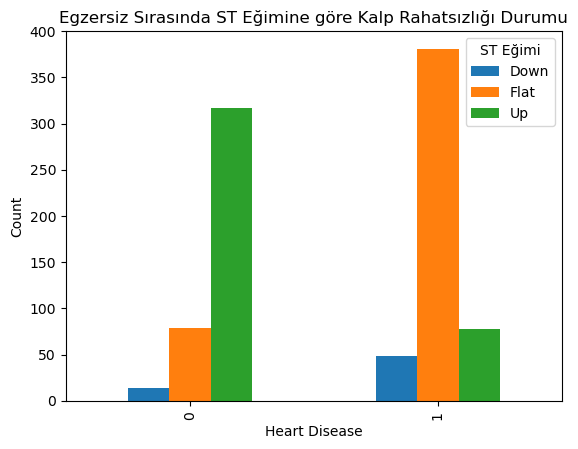

In [544]:
counts2 = df.groupby(["HeartDisease", "ST_Slope"]).size().unstack()

counts2.plot(kind="bar")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Egzersiz Sırasında ST Eğimine göre Kalp Rahatsızlığı Durumu")
plt.legend(title="ST Eğimi", loc='upper right')
plt.show()

# ST eğiminin yukarı yönlü olduğunda kişilerde kalp rahatsızlığı olmadığı,
# ST eğiminin aşağı yönlü olduğunda kişilerde kalp rahatsızlığı gözlemlenmiştir.

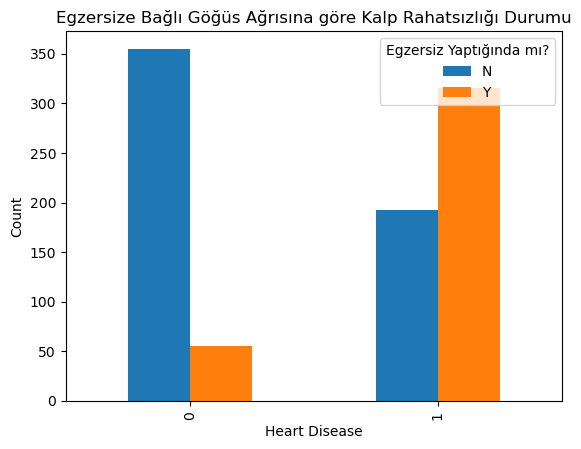

In [545]:
counts3 = df.groupby(["HeartDisease", "ExerciseAngina"]).size().unstack()

counts3.plot(kind="bar")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("Egzersize Bağlı Göğüs Ağrısına göre Kalp Rahatsızlığı Durumu")
plt.legend(title="Egzersiz Yaptığında mı?", loc='upper right')
plt.show()

# Egzersiz durumuna bağlı olarak göğüs ağrısı çeken kişilerin kalp rahatsızlığına sahip olduğu gözlemlenmiştir.

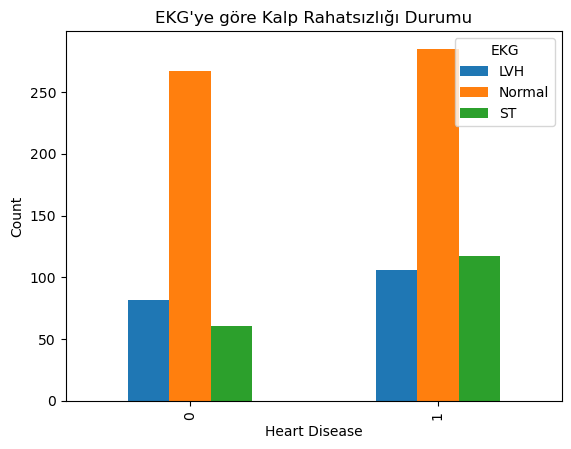

In [546]:
counts4 = df.groupby(["HeartDisease", "RestingECG"]).size().unstack()

counts4.plot(kind="bar")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.title("EKG'ye göre Kalp Rahatsızlığı Durumu")
plt.legend(title="EKG", loc='upper right')
plt.show()

# EKG'de Normal değeri için kalp rahatsızlığı durumuna göre bir farklılık göstermemiştir.
# EKG tek başına karar vermek için uygun bir test olmayabilir.

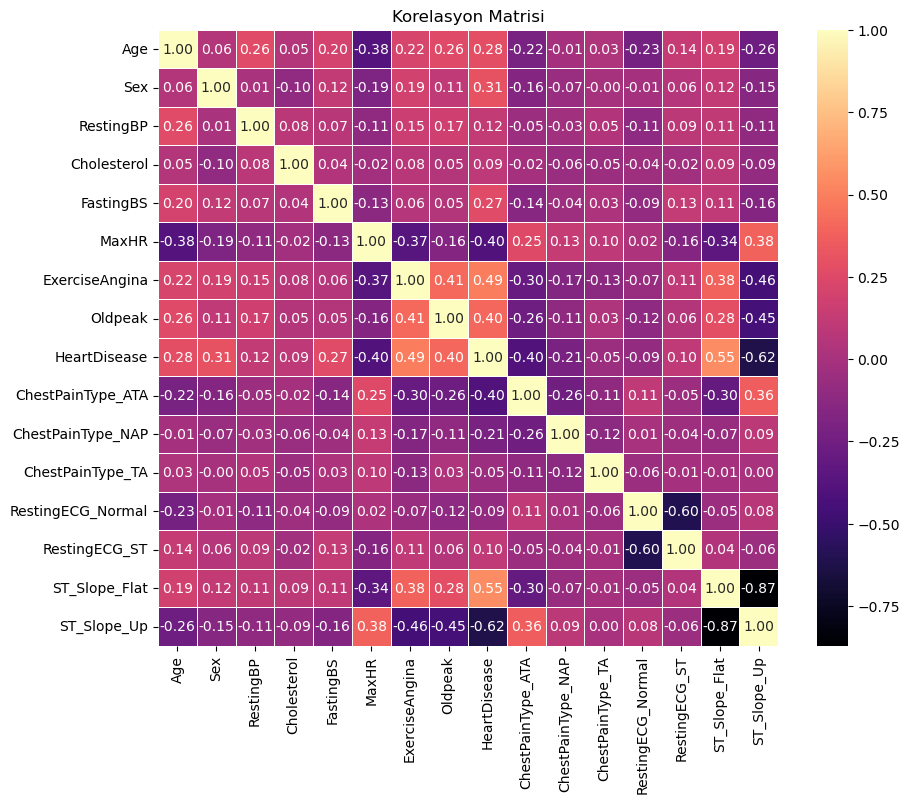

In [500]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="magma", fmt=".2f", linewidths=.5)
plt.title("Korelasyon Matrisi")
plt.show()

## Veri Önişleme

In [547]:
#Object değişkenleri kategoriğe çevirme

df[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope", "FastingBS"]] = df[["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope","FastingBS"]].astype('category')

#Değişken encoding

lbe = LabelEncoder()
ohe = OneHotEncoder()

df["Sex"] = lbe.fit_transform(df["Sex"]) # 1 Male, 0 Female
df["ExerciseAngina"] = lbe.fit_transform(df["ExerciseAngina"]) # 1 Yes, 0 No
df["FastingBS"] = lbe.fit_transform(df["FastingBS"]) # 1 Açlık Kan Şekerinin 120 mg/dl'den büyük olduğu durumlar,
                                                     # 0 120 mg/dl'den küçük olduğu durumlar.

df = pd.get_dummies(df, columns=["ChestPainType","RestingECG","ST_Slope"],drop_first=True, dtype="int64")

In [548]:
mms = MinMaxScaler() # Normalizasyon
ss = StandardScaler() # Standardizasyon

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])

In [549]:
X = df.drop(["HeartDisease"], axis = 1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.20,
                                                   random_state=42)

In [550]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(734, 15)
(184, 15)
(734,)
(184,)


In [ ]:
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,fmt ='')

## Lojistik Regresyon

0.869281045751634
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       410
           1       0.87      0.90      0.88       508

    accuracy                           0.87       918
   macro avg       0.87      0.87      0.87       918
weighted avg       0.87      0.87      0.87       918



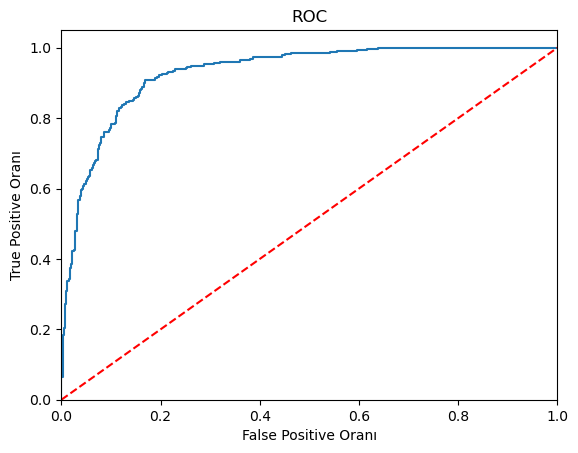

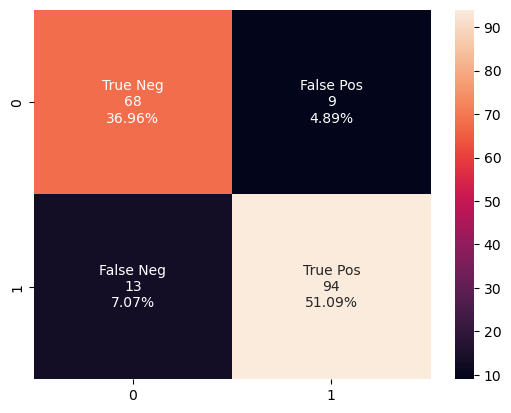

In [551]:
loj = LogisticRegression(solver= "liblinear")
loj_model = loj.fit(X,y)

y_pred = loj_model.predict(X)
print(accuracy_score(y, y_pred))

print(classification_report(y, y_pred))

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

model_evaluation(loj_model)

## Destek Vektör Makinesi

0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



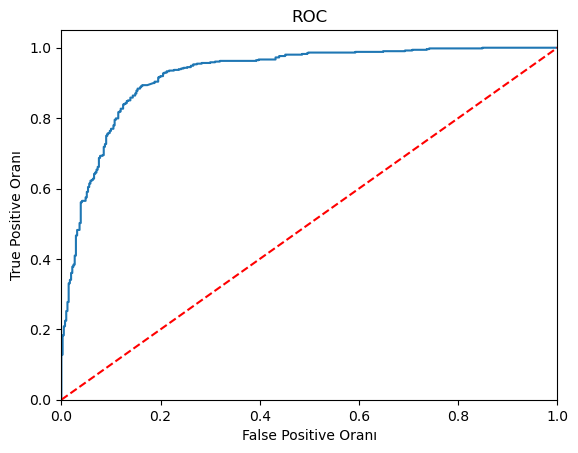

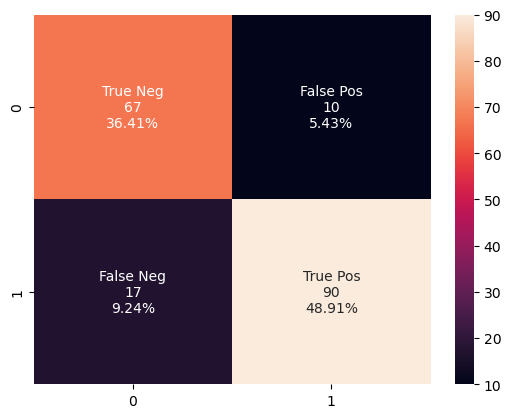

In [552]:
svm_model = SVC(kernel = "linear",probability=True).fit(X_train, y_train)

y_pred = svm_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y, svm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, svm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

model_evaluation(svm_model)

### Destek Vektör Makinesi Model Tuning

In [510]:
svc_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc, svc_params, cv = 10, n_jobs = -1, verbose = 2)

svc_cv_model.fit(X_train, y_train)

print(svc_cv_model.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
{'C': 100}


0.8532608695652174


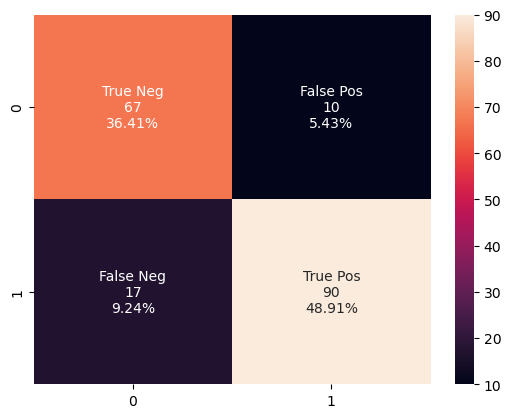

In [553]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(X_train, y_train)

y_pred = svc_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))

model_evaluation(svc_tuned)

## Random Forest

0.8586956521739131
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



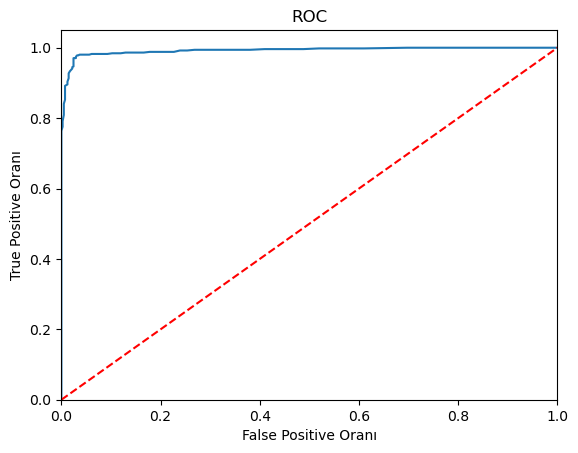

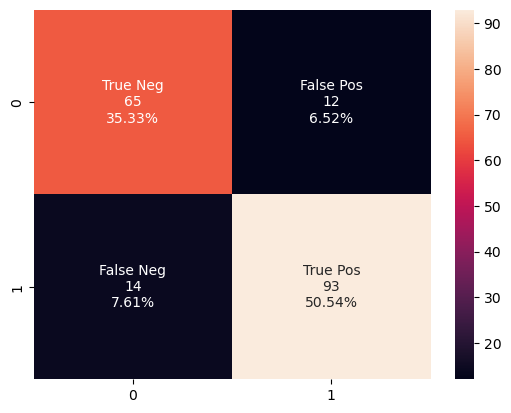

In [561]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y, rf_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

model_evaluation(rf_model)

### Random Forest Model Tuning

In [ ]:
rf_params = {"bootstrap": [True],
             "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             "max_features": ['auto', 'sqrt'],
             "min_samples_leaf": [1, 2, 4],
             "min_samples_split": [2, 5, 10],
             "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                          rf_params,
                          cv = 10,
                          n_jobs = -1,
                          verbose = 2)

rf_cv_model.fit(X_train, y_train)

# Githuba eklediğimde iterasyondan kaynaklı projeyi düzgün gözlemleyemediğim için bu kod bloğunu tekrardan çalıştırmadım

In [ ]:
rf_cv_model.best_params_

0.8641304347826086


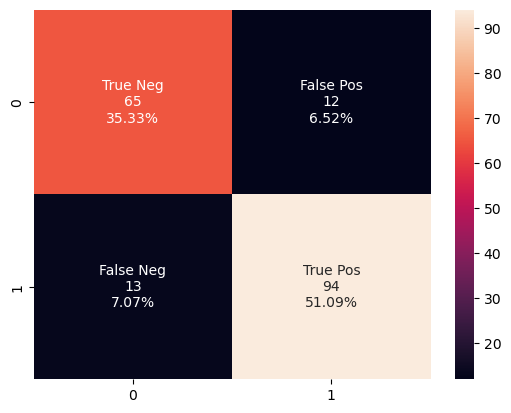

In [562]:
rf_model = RandomForestClassifier(bootstrap=True,
                                  max_depth=30,
                                  max_features='sqrt',
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  n_estimators = 200)

rf_tuned = rf_model.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))

model_evaluation(rf_tuned)

## K-En Yakın Komşu

0.8152173913043478
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        77
           1       0.86      0.81      0.84       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



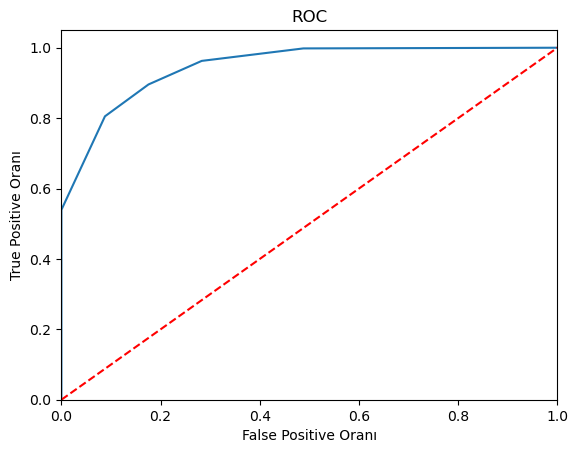

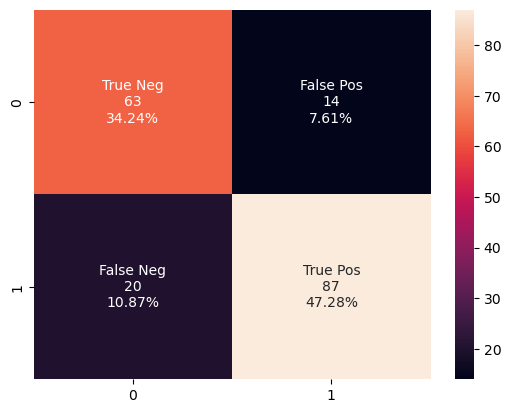

In [569]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y, knn_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, knn_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

model_evaluation(knn_model)

### K-En Yakın Komşu Model Tuning

In [ ]:
knn_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_cv_model = GridSearchCV(knn_model,
                            knn_params,
                            cv = 10,
                            n_jobs = -1,
                            verbose = 2)

knn_cv_model.fit(X_train, y_train)

In [ ]:
knn_cv_model.best_params_

0.842391304347826


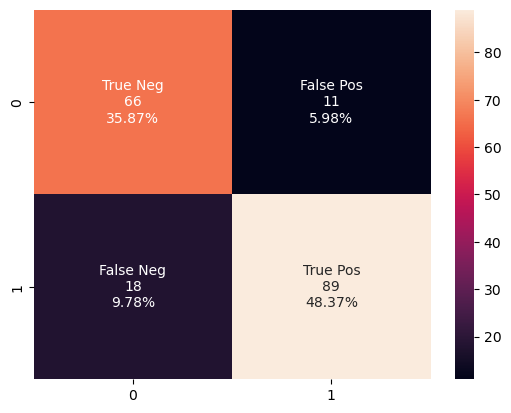

In [570]:
knn = KNeighborsClassifier(n_neighbors=7,
                          weights='distance',
                          metric='manhattan')

knn_tuned = knn.fit(X_train, y_train)

y_pred = knn_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))

model_evaluation(knn_tuned)

## Catboost

Learning rate set to 0.009028
0:	learn: 0.6863280	total: 1.8ms	remaining: 1.8s
500:	learn: 0.1940030	total: 516ms	remaining: 514ms
999:	learn: 0.1192535	total: 1.01s	remaining: 0us
0.8695652173913043
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



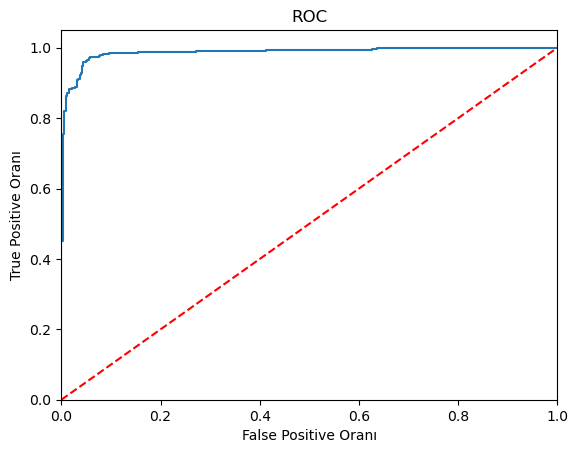

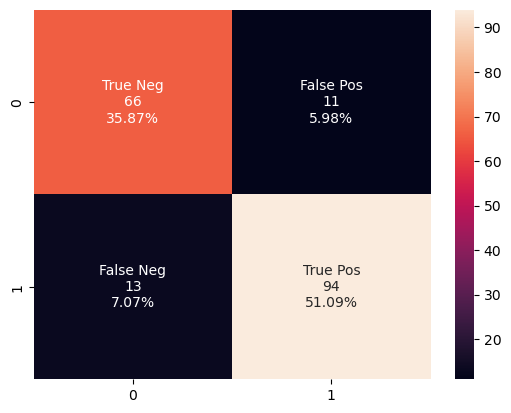

In [571]:
cat = CatBoostClassifier(metric_period=500)
cat_model = cat.fit(X_train, y_train)

y_pred = cat_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

logit_roc_auc = roc_auc_score(y, cat_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, cat_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

model_evaluation(cat_model)

### Catboost Model Tuning

In [ ]:
catb_params = {'iterations': [200,500],
              'learning_rate': [0.01, 0.05, 0.1],
              'depth': [3,5,8]}

cat = CatBoostClassifier()

cat_cv_model = GridSearchCV(cat, catb_params, cv = 5, n_jobs=-1, verbose=2)
cat_cv_model.fit(X_train, y_train)

In [ ]:
cat_cv_model.best_params_

0:	learn: 0.6663847	total: 2.59ms	remaining: 515ms
199:	learn: 0.2306400	total: 104ms	remaining: 0us
0.875


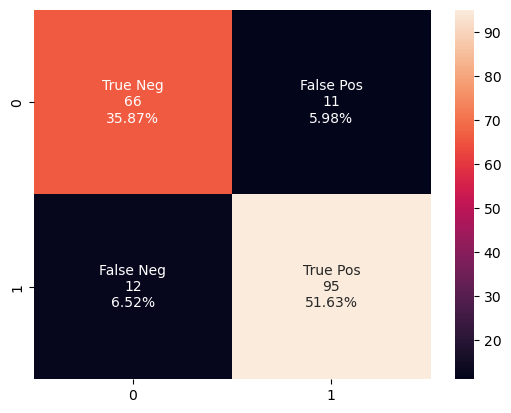

In [572]:
cat = CatBoostClassifier(iterations= 200,
                        learning_rate= 0.05,
                        depth = 3,
                        metric_period=500)

cat_tuned = cat.fit(X_train, y_train)

y_pred = cat_tuned.predict(X_test)
print(accuracy_score(y_test, y_pred))

model_evaluation(cat_tuned)

In [573]:
modeller = [loj_model,
            svc_tuned,
            rf_tuned,
            knn_tuned,
            cat_tuned]

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
LogisticRegression:
Accuracy: 88.0435%
----------------------------
SVC:
Accuracy: 85.3261%
----------------------------
RandomForestClassifier:
Accuracy: 86.4130%
----------------------------
KNeighborsClassifier:
Accuracy: 84.2391%
----------------------------
CatBoostClassifier:
Accuracy: 87.5000%
